In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import data


In [3]:
samples_age = pd.read_pickle('../../data/geo-annotation/samples.age.cleaned.v1.pickle')

In [4]:
samples_tissue = pd.read_pickle('../../data/geo-annotation/samples.tissue.cleaned.v1.pickle')

In [5]:
samples_norms = pd.read_pickle('../../data/geo-annotation/samples.norms.07.res4.pickle')

In [6]:
samples_age.head()

,accession,characteristics,series,platform,organism,age,isfloat
22869,E-MTAB-872_0,"{'Age': '0', 'CellType': 'embryonic stem', 'In...",[E-MTAB-872],A-GEOD-10558,Homo sapiens,0,True
22870,E-MTAB-872_1,"{'Age': '0', 'CellType': 'embryonic stem', 'In...",[E-MTAB-872],A-GEOD-10558,Homo sapiens,0,True
22871,E-MTAB-872_2,"{'Age': '0', 'CellType': 'embryonic stem', 'In...",[E-MTAB-872],A-GEOD-10558,Homo sapiens,0,True
22890,E-MTAB-487_0,"{'Age': '0', 'CellType': 'CD34+ hematopoietic ...",[E-MTAB-487],A-GEOD-8490,Homo sapiens,0,True
22891,E-MTAB-487_1,"{'Age': '0', 'CellType': 'CD34+ hematopoietic ...",[E-MTAB-487],A-GEOD-8490,Homo sapiens,0,True


In [7]:
samples_tissue.head()

,collapsed
item,
GSM1006272,BTO:0000759
E-MTAB-3099_162,BTO:0000759
GSM645939,BTO:0000855
GSM429771,BTO:0000848
E-MTAB-3732_3998,BTO:0000876


In [8]:
samples = (
    samples_age
    .set_index('accession')
    .join(samples_tissue)
)
samples.shape

(139273, 7)

In [9]:
tissue_ontology = data.tissue_ontology()

Read obo graph
Name: 
Type: DiGraph
Number of nodes: 5659
Number of edges: 6430
Average in degree:   1.1362
Average out degree:   1.1362


In [10]:
blood_id = 'BTO:0000089'

descendants = tissue_ontology.descendants(blood_id)
map_f = tissue_ontology.to_parent_f(descendants)

samples_blood = (
    samples
    .assign(blood_tissue_id=lambda d: d['collapsed'].map(map_f))
    .dropna(subset=['blood_tissue_id'])
    .assign(age=lambda d: d['age'].astype(float))
    .query('1 < age < 80')
)
samples_blood.head()

,characteristics,series,platform,organism,age,isfloat,collapsed,blood_tissue_id
accession,,,,,,,,
E-MEXP-313_42,"{'Age': '1.8', 'TargetedCellType': ' ', 'Time...",[E-MEXP-313],A-AFFY-33,Homo sapiens,1.8,True,BTO:0000553,BTO:0000553
E-MTAB-1425_5,"{'Age': '10', 'disease state': 'asthma', 'Sex'...",[E-MTAB-1425],A-AFFY-44,Homo sapiens,10.0,True,BTO:0000773,BTO:0000574
E-MTAB-1425_13,"{'Age': '10', 'disease state': 'normal', 'Sex'...",[E-MTAB-1425],A-AFFY-44,Homo sapiens,10.0,True,BTO:0000773,BTO:0000574
E-MTAB-1425_19,"{'Age': '10', 'disease state': 'asthma', 'Sex'...",[E-MTAB-1425],A-AFFY-44,Homo sapiens,10.0,True,BTO:0000773,BTO:0000574
E-MTAB-1425_23,"{'Age': '10', 'disease state': 'normal', 'Sex'...",[E-MTAB-1425],A-AFFY-44,Homo sapiens,10.0,True,BTO:0000773,BTO:0000574


In [11]:
samples_blood.shape

(19631, 8)

In [12]:
(
    samples_blood
    .merge(samples_norms, left_index=True, right_on='accession')
#     .query('norm == 1')
    .shape
)

(9286, 10)

In [16]:
samples_blood_norm = (
    samples_blood
    .merge(samples_norms, left_index=True, right_on='accession')
)

In [17]:
samples_blood_norm.to_pickle('../../data/geo-annotation/intermediate/samples-blood-with-norm.pickle')

In [13]:
(
    samples_blood
    .merge(samples_norms, left_index=True, right_on='accession')
    .query('norm == 1')
    .shape
)

(2213, 10)

In [14]:
samples_blood.organism.value_counts()

Homo sapiens    19631
dtype: int64

In [15]:
(
    samples_blood
    .collapsed
    .value_counts()
    .to_frame()
    .reset_index()
    .assign(index=lambda d: d['index'].map(tissue_ontology.name))
    [:20]
)

,index,0
0,peripheral blood,7465
1,peripheral blood mononuclear cell,3183
2,leukocyte,2519
3,b-lymphocyte,1040
4,blood platelet,742
5,t-lymphocyte,688
6,lymphoblastoid cell line,598
7,hematopoietic cell,547
8,blast cell,526
9,lymphoblast,453


In [17]:
samples_blood[samples_blood.platform.isnull()]

,characteristics,series,platform,organism,age,isfloat,collapsed,blood_tissue_id
accession,,,,,,,,
E-MTAB-3858_2,"{'genotype': 'R117C', 'age': '28', 'sex': 'fem...",[E-MTAB-3858],None,Homo sapiens,28,True,BTO:0000775,BTO:0000574
E-MTAB-3858_3,"{'genotype': 'R117C', 'age': '28', 'sex': 'fem...",[E-MTAB-3858],None,Homo sapiens,28,True,BTO:0000775,BTO:0000574
E-MTAB-2706_664,"{'cell line': 'U-937', 'freeze media': 'Comple...",[E-MTAB-2706],None,Homo sapiens,37,True,BTO:0000776,BTO:0000574
E-MTAB-2706_665,"{'cell line': 'U-937', 'freeze media': 'Comple...",[E-MTAB-2706],None,Homo sapiens,37,True,BTO:0000776,BTO:0000574
E-MTAB-3858_0,"{'genotype': 'R117C', 'age': '45', 'sex': 'fem...",[E-MTAB-3858],None,Homo sapiens,45,True,BTO:0000775,BTO:0000574
E-MTAB-3858_1,"{'genotype': 'R117C', 'age': '45', 'sex': 'fem...",[E-MTAB-3858],None,Homo sapiens,45,True,BTO:0000775,BTO:0000574
E-MTAB-513_21,"{'age': '58', 'ethnic group': 'Caucasian', 'ti...",[E-MTAB-513],None,Homo sapiens,58,True,BTO:0000751,BTO:0000574
E-MTAB-513_22,"{'age': '58', 'ethnic group': 'Caucasian', 'ti...",[E-MTAB-513],None,Homo sapiens,58,True,BTO:0000751,BTO:0000574
E-MTAB-513_23,"{'age': '58', 'ethnic group': 'Caucasian', 'ti...",[E-MTAB-513],None,Homo sapiens,58,True,BTO:0000751,BTO:0000574


In [18]:
(
    samples_blood
    .dropna(subset=['platform'])
    .rename(columns={'collapsed': 'tissue_id'})
    .assign(tissue_name=lambda d: d.tissue_id.map(tissue_ontology.name))
    .assign(series=lambda d: d['series'].map(','.join))
    .assign(platform=lambda d: d['platform'].map(lambda p: p.replace('A-GEOD-', 'GPL')))
    .reset_index()
    [['accession', 'characteristics', 'series', 'platform', 'organism', 'age', 'tissue_id', 'tissue_name']]
    .to_csv('../../data/geo-annotation/intermediate/samples.blood.age.v1.csv', index=False)
)

## Age analysis

In [19]:
import seaborn
%matplotlib inline

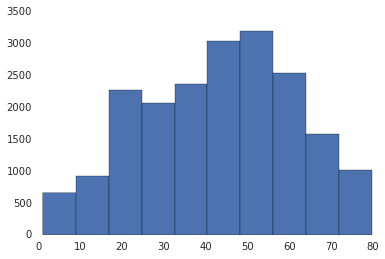

In [20]:
samples_blood.age.hist()

## Platform analysis

In [23]:
(
    samples_blood
    .merge(samples_norms, left_index=True, right_on='accession')
    .query('norm == 1')
    .dropna(subset=['platform'])
    .platform
    .value_counts()
    .to_frame()
)

,0
GPL10558,347
GPL13534,239
GPL6883,217
GPL570,162
A-AFFY-44,140
GPL9183,107
GPL18887,100
A-MEXP-1820,83
GPL11532,78
GPL6848,66


## Какой тип платформ

In [24]:
platforms = [p for p in (
    samples_blood
    .dropna(subset=['platform'])
    .platform
    .unique()
    .tolist()
) if p.startswith('GPL')]
len(platforms)

90

In [25]:
import pymongo
db = pymongo.MongoClient().scraper_test

In [ ]:
platforms[:10]

In [26]:
platformds_df = pd.DataFrame(list(db.platforms.find({'accession': {'$in': platforms}})))

In [27]:
platformds_df.head(3)

,_id,accession,alternatives,catalog_number,coating,contact,data_source,description,distribution,last_update_date,...,meta,organism,scrap_date,status,submission_date,supplementary_files,support,technology,title,web_link
0,55770ac7a138571b7fcb0fe3,GPL17077,"[{'type': '', 'to': 'GPL16699'}]",None,None,"{'Phone': '877-424-4536', 'State/province': 'C...",geo,SurePrint G3 Human GE v2 8x60K Microarray,commercial,2013-04-26,...,{'geo_id': 17077},Homo sapiens,2015-06-09 15:48:20.342,"Public on Apr 26, 2013",2013-04-26,[],None,in situ oligonucleotide,Agilent-039494 SurePrint G3 Human GE v2 8x60K ...,None
1,55770a6da138571b7fcaeb88,GPL3720,[],None,None,"{'Phone': '888-362-2447', 'State/province': 'C...",geo,Affymetrix submissions are typically submitted...,commercial,2013-08-21,...,{'geo_id': 3720},Homo sapiens,2015-06-09 15:46:51.691,"Public on May 13, 2006",2006-05-02,[],None,in situ oligonucleotide,[Mapping250K_Sty] Affymetrix Mapping 250K Sty2...,[http://www.affymetrix.com/support/technical/b...
2,55770a76a138571b7fcaf019,GPL5114,[],None,other,"{'Phone': '00493084131251', 'Name': 'Reinhard ...",geo,None,non-commercial,2007-05-27,...,{'geo_id': 5114},Homo sapiens,2015-06-09 15:47:02.558,"Public on May 22, 2007",2007-04-23,[],glass,spotted DNA/cDNA,MPIMG Homo sapiens 36k_arrayCGH8,None


In [30]:
platforms_info = (
    samples_blood
#     .merge(samples_norms, left_index=True, right_on='accession')
#     .query('norm == 1')
    .dropna(subset=['platform'])
    .platform
    .value_counts()
    .to_frame()
    .reset_index()
    .merge(platformds_df, left_on='index', right_on='accession', how='left')
    [['index', 'manufacturer', 'title', 'technology', 0]]
#     .assign(title=lambda d: d.title.str.lower())
)
platforms_info

,index,manufacturer,title,technology,0
0,GPL13534,"Illumina, Inc.",Illumina HumanMethylation450 BeadChip (HumanMe...,oligonucleotide beads,3799
1,GPL570,Affymetrix,[HG-U133_Plus_2] Affymetrix Human Genome U133 ...,in situ oligonucleotide,2164
2,GPL18938,Nanostring Technologies,Nanostring nCounter ImmVar CD4+ T cell Custom ...,other,1927
3,GPL10558,Illumina Inc.,Illumina HumanHT-12 V4.0 expression beadchip,oligonucleotide beads,950
4,GPL6604,Roche NimbleGen,HG17_HELP_Promoter,in situ oligonucleotide,727
5,GPL6883,Illumina Inc.,Illumina HumanRef-8 v3.0 expression beadchip,oligonucleotide beads,643
6,GPL6244,Affymetrix,[HuGene-1_0-st] Affymetrix Human Gene 1.0 ST A...,in situ oligonucleotide,548
7,A-AFFY-44,NaN,NaN,NaN,515
8,GPL10904,Illumina Inc.,Illumina HumanHT-12 V4.0 expression beadchip (...,oligonucleotide beads,425
9,GPL96,Affymetrix,[HG-U133A] Affymetrix Human Genome U133A Array,in situ oligonucleotide,402


In [29]:
platforms_info = (
    samples_blood
    .merge(samples_norms, left_index=True, right_on='accession')
    .query('norm == 1')
    .dropna(subset=['platform'])
    .platform
    .value_counts()
    .to_frame()
    .reset_index()
    .merge(platformds_df, left_on='index', right_on='accession', how='left')
    [['index', 'manufacturer', 'title', 'technology', 0]]
#     .assign(title=lambda d: d.title.str.lower())
)
platforms_info

,index,manufacturer,title,technology,0
0,GPL10558,Illumina Inc.,Illumina HumanHT-12 V4.0 expression beadchip,oligonucleotide beads,347
1,GPL13534,"Illumina, Inc.",Illumina HumanMethylation450 BeadChip (HumanMe...,oligonucleotide beads,239
2,GPL6883,Illumina Inc.,Illumina HumanRef-8 v3.0 expression beadchip,oligonucleotide beads,217
3,GPL570,Affymetrix,[HG-U133_Plus_2] Affymetrix Human Genome U133 ...,in situ oligonucleotide,162
4,A-AFFY-44,NaN,NaN,NaN,140
5,GPL9183,Illumina,Illumina GoldenGate Methylation Cancer Panel I,oligonucleotide beads,107
6,GPL18887,National Engineering Research Center for Minia...,NERCMDSNU Homo sapiens 15K version 1.0,spotted oligonucleotide,100
7,A-MEXP-1820,NaN,NaN,NaN,83
8,GPL11532,Affymetrix,[HuGene-1_1-st] Affymetrix Human Gene 1.1 ST A...,in situ oligonucleotide,78
9,GPL6848,Agilent Technologies,Agilent-012391 Whole Human Genome Oligo Microa...,in situ oligonucleotide,66


In [ ]:
(
    platforms_info
#     .dropna(subset=['title'])
    [platforms_info.title.astype(str).map(lambda t: 'methy' in t.lower())]
)

In [ ]:
(
    platforms_info
    [platforms_info.title.astype(str).map(lambda t: 'methy' not in t.lower())]
    .assign(manufacturer=lambda d: d.manufacturer.astype(str).map(lambda m: 'Illumina' if 'illumina' in m.lower() else m))
    .groupby('manufacturer')
    [0].sum()
    .to_frame()
    .sort(0, ascending=False)
    [:10]
)

In [ ]:
(
    platforms_info
#     [platforms_info.title.astype(str).map(lambda t: 'methy' not in t.lower())]
    .query('manufacturer == "Affymetrix"')    
    .groupby('index')
    [0].sum()
    .to_frame()
    .sort(0, ascending=False)
    [:10]
)

In [ ]:
(
    platforms_info
    [platforms_info.title.astype(str).map(lambda t: 'methy' not in t.lower())]
    .assign(manufacturer=lambda d: d.manufacturer.astype(str).map(lambda m: 'Illumina' if 'illumina' in m.lower() else m))
    .query('manufacturer == "Illumina"')    
    .groupby('index')
    [0].sum()
    .to_frame()
    .sort(0, ascending=False)
    [:10]
)

## GPL18938

In [ ]:
GSE60341_GPL18938_file = 'http://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE60341&format=file&file=GSE60341%5Fnanostring%5Fprocessed%5Fdata%2Etxt%2Egz'

    

In [ ]:
! wget "$GSE60341_GPL18938_file" -P../../data/geo-annotation/intermediate/

In [ ]:
! mv "../../data/geo-annotation/intermediate/index.html?acc=GSE60341&format=file&file=GSE60341%5Fnanostring%5Fprocessed%5Fdata%2Etxt%2Egz" \
     "../../data/geo-annotation/intermediate/GSE60341_nanostring_processed_data.txt.gz"

In [ ]:
! gunzip "../../data/geo-annotation/intermediate/GSE60341_nanostring_processed_data.txt.gz"

In [ ]:
! head ../../data/geo-annotation/intermediate/GSE60341_nanostring_processed_data.txt

In [ ]:
pd.read_table("../../data/geo-annotation/intermediate/GSE60341_nanostring_processed_data.txt", skiprows=1).head()